In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List

df = pd.read_csv("spotify_dataset.csv", index_col=[0])


target: str = "popularity"

grouped_track: pd.DataFrame = df.groupby("track_genre")
grouped_track.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113000,5XCtjnFMKtCT7ycDwV3Kdh,Hillsong Worship;Brooke Ligertwood,What A Beautiful Name,What A Beautiful Name,66,240200,False,0.417,0.4990,2,-6.364,1,0.0296,0.2120,0.000000,0.1120,0.144,135.923,4,world-music
113001,0fxpHpK3aw2nFWII6yveDD,Matt Redman,"10,000 Reasons (Live)","10,000 Reasons (Bless The Lord) - Live",66,342493,False,0.431,0.4850,7,-8.085,1,0.0274,0.4520,0.000000,0.5440,0.367,145.220,4,world-music
113002,0rH0mprtecH3grD9HFM5AD,Cory Asbury,Reckless Love,Reckless Love,70,333386,False,0.572,0.6850,6,-7.290,1,0.0356,0.0291,0.000000,0.0963,0.232,110.698,4,world-music
113003,1O6OPFAXdTdjHtT7Z2Hlt8,Bethel Music;Jenn Johnson,Peace,Goodness of God,61,456480,False,0.370,0.1190,6,-11.513,1,0.0392,0.9530,0.000002,0.0990,0.183,110.424,4,world-music


In [5]:
track_popular = pd.DataFrame(grouped_track[target].mean()).sort_values(target, ascending=False).head(50).index
track_popular

Index(['pop-film', 'k-pop', 'chill', 'sad', 'grunge', 'indian', 'anime', 'emo',
       'sertanejo', 'pop', 'progressive-house', 'piano', 'mandopop',
       'deep-house', 'brazil', 'electronic', 'pagode', 'ambient', 'british',
       'metal', 'metalcore', 'psych-rock', 'hard-rock', 'acoustic', 'dubstep',
       'world-music', 'forro', 'gospel', 'j-pop', 'french', 'garage', 'mpb',
       'turkish', 'j-rock', 'indie-pop', 'dub', 'techno', 'indie', 'samba',
       'punk', 'punk-rock', 'folk', 'spanish', 'groove', 'singer-songwriter',
       'songwriter', 'hip-hop', 'trance', 'swedish', 'r-n-b'],
      dtype='object', name='track_genre')

In [6]:
def groupedAndSorted(df: pd.DataFrame) :
    ...
def printLenOfPopularGenre(genreDf: pd.DataFrame,
                           topGenre_col:List[str], n=80):
    df_temp = pd.DataFrame(columns=['genre', 'percent'])
    for col in topGenre_col:
        df = genreDf[genreDf['track_genre'] == col]
        df = df.sort_values(target, ascending=False)
        perc = len(df[df[target] >= n]) / len(df)  * 100
        new_obs = {'genre' : col, 'percent': perc}
        df_temp = pd.concat([df_temp, pd.DataFrame(new_obs, index=[0])], ignore_index=True)
        print(f"{col} genre has : {perc} percent songs above {n} popularity")
    return df_temp.sort_values('percent', ascending=False)

printLenOfPopularGenre(df, track_popular, 90).head(50)

/tmp/ipykernel_9188/2608788483.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_temp = pd.concat([df_temp, pd.DataFrame(new_obs, index=[0])], ignore_index=True)


pop-film genre has : 0.0 percent songs above 90 popularity
k-pop genre has : 0.0 percent songs above 90 popularity
chill genre has : 0.1 percent songs above 90 popularity
sad genre has : 0.0 percent songs above 90 popularity
grunge genre has : 0.0 percent songs above 90 popularity
indian genre has : 0.0 percent songs above 90 popularity
anime genre has : 0.0 percent songs above 90 popularity
emo genre has : 0.0 percent songs above 90 popularity
sertanejo genre has : 0.0 percent songs above 90 popularity
pop genre has : 1.7999999999999998 percent songs above 90 popularity
progressive-house genre has : 0.0 percent songs above 90 popularity
piano genre has : 0.2 percent songs above 90 popularity
mandopop genre has : 0.0 percent songs above 90 popularity
deep-house genre has : 0.1 percent songs above 90 popularity
brazil genre has : 0.0 percent songs above 90 popularity
electronic genre has : 0.0 percent songs above 90 popularity
pagode genre has : 0.0 percent songs above 90 popularity
amb

,genre,percent
9,pop,1.8
46,hip-hop,0.4
11,piano,0.2
49,r-n-b,0.1
43,groove,0.1
30,garage,0.1
37,indie,0.1
41,folk,0.1
13,deep-house,0.1
44,singer-songwriter,0.1


In [7]:
import ModelBuilder
from Main_Enum import ModelName
import DataPreps
import importlib
importlib.reload(ModelBuilder)
from sklearn.model_selection import train_test_split
from omegaconf import OmegaConf
config = OmegaConf.load('params.yaml')
num_cols: List[str] = [
    config.constant.danceability_str,
    config.constant.loudness_str,
    config.constant.speechiness_str,
    config.constant.acousticness_str,
    config.constant.instrumentallness_str,
    config.constant.popularity_str,
    config.constant.liveness_str,
    config.constant.valence_str,
    config.constant.tempo_str,
    config.constant.duration_str
]

cat_cols: List[str] = [
    config.constant.artists_str,
    config.constant.track_genre_str,
    config.constant.explicit_str
]
drop_cols: List[str] = [
    config.constant.track_id_str,
    config.constant.album_name_str,
    config.constant.track_name_str
]

x, y, scaler, cat_scaler = DataPreps.run(config, target)
predictors: List[str] = x.columns.values
#x, y = x.values, y.values
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2)
model  = ModelBuilder.preserveModel(ModelName.LIGHT_GBM,
                                    config)
x_train_values, x_val_values = x_train.values, x_val.values
y_train_values, y_val_values = y_train.values, y_val.values
miss_train, miss_val = ModelBuilder.errorAnalysis_fit(x_train_values, y_train_values,
                                                      x_val_values, y_val_values,
                                                      x, model, ModelName.LIGHT_GBM)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2940
[LightGBM] [Info] Number of data points in the train set: 91199, number of used features: 16
[LightGBM] [Info] Start training from score 33.301286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [8]:
import ModelBuilder
importlib.reload(ModelBuilder)
supported_models: List[str] = [config.cmd.dt, config.cmd.rf,
                               config.cmd.knn, config.cmd.ada_bst,
                               config.cmd.lin_reg,
                               config.cmd.lgbm,
                               config.cmd.xgboost]
result_all = ModelBuilder.runAllModels(config, supported_models, 2, "popularity")

=========  ==========
RMSE Train: 178.58 
RMSE VAL : 201.952
=========  ==========

=========  ==========
RMSE Train: 183.578 
RMSE VAL : 202.401
=========  ==========



/mnt/Development-Main/Vos/S2_Porjects/Spotify_analysis/ModelBuilder.py:541: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_result = pd.concat([all_result, pd.DataFrame(new_observation, index=[0])],


=========  ==========
RMSE Train: 153.637 
RMSE VAL : 176.793
=========  ==========

=========  ==========
RMSE Train: 149.78 
RMSE VAL : 174.304
=========  ==========

=========  ==========
RMSE Train: 5.8092 
RMSE VAL : 180.334
=========  ==========

=========  ==========
RMSE Train: 6.83986 
RMSE VAL : 178.9
=========  ==========

=========  ==========
RMSE Train: 284.012 
RMSE VAL : 287.264
=========  ==========

=========  ==========
RMSE Train: 284.149 
RMSE VAL : 281.777
=========  ==========

=========  ==========
RMSE Train: 241.898 
RMSE VAL : 242.915
=========  ==========

=========  ==========
RMSE Train: 242.737 
RMSE VAL : 242.08
=========  ==========

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2940
[LightGBM] [Info] Number of data points in the train set: 56999, 

In [9]:
result_all

,model,rmse_train,rmse_val
0,ModelName.DT,183.577991,202.401343
1,ModelName.RF,149.779635,174.303538
2,ModelName.KNN,6.839856,178.899892
3,ModelName.ADA_BST,284.149193,281.777036
4,ModelName.LIN_REG,242.736584,242.079792
5,ModelName.LIGHT_GBM,14.909180,112.285994
6,ModelName.X_BST,8.373769,128.689055


In [10]:
cat_scaler[0].inverse_transform(miss_train['artists'])

array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN', ...,
       'The Rolling Stones', 'The Rolling Stones;Alok',
       'The Rolling Stones'], dtype=object)

In [11]:
miss_train_real = ModelBuilder.preserveRealValues(miss_train, scaler, cat_scaler, cat_cols)
miss_val_real = ModelBuilder.preserveRealValues(miss_val, scaler, cat_scaler, cat_cols)
miss_train_real.head()


,artists,explicit,energy,key,mode,time_signature,track_genre,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,predicted_train,model_name
0,Gen Hoshino,False,0.4610,1,0,4,acoustic,0.676,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,230666.0,0,12.181785,LIGHT_GBM
1,Ben Woodward,False,0.1660,1,1,4,acoustic,0.420,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,149610.0,45,45.981540,LIGHT_GBM
2,Ingrid Michaelson;ZAYN,False,0.3590,0,1,4,acoustic,0.438,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,210826.0,50,42.857250,LIGHT_GBM
3,Kina Grannis,False,0.0596,0,1,3,acoustic,0.266,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,201933.0,23,24.930741,LIGHT_GBM
4,Chord Overstreet,False,0.4430,2,1,4,acoustic,0.618,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853.0,2,1.900767,LIGHT_GBM


/mnt/Development-Main/Vos/S2_Porjects/Spotify_analysis/ErrorAnalysisUtils.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_temp = pd.concat([df_temp, pd.DataFrame(new_obs,


    track_genre   percent
1     breakbeat  1.915323
44  rock-n-roll  1.715439
48       indian  1.614531
7          rock  1.515152
32       grunge  1.513623
82      new-age  1.407035
13        dance  1.404213
4          punk  1.310484
51      dubstep  1.307847
6     hardstyle  1.215805
35    dancehall  1.210898
55      electro  1.210898
56        happy  1.210898
16    classical  1.209677
91        indie  1.209677


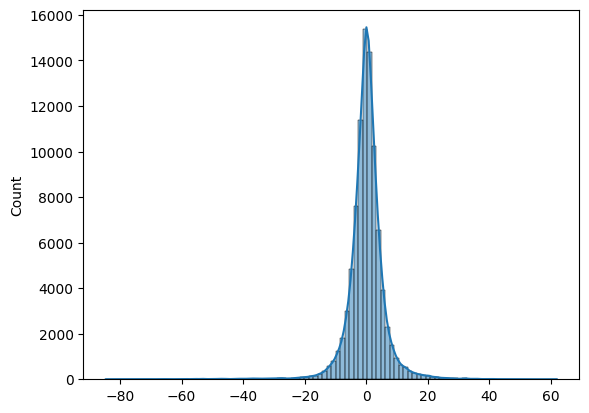

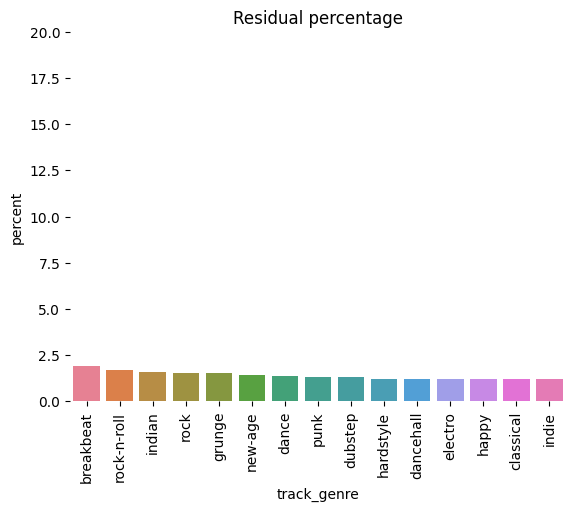

In [24]:
import ErrorAnalysisUtils as eau
importlib.reload(eau)
column_cat: str = "track_genre"
column_target: str = "popularity"
column_pred: str ="predicted_train"
limit_resid_1: int = 0
limit_resid_2: int = 30
threshold_target: int = 30
n = 15
eau.plotErrorAnalysisCat_num(miss_train_real, column_cat,
                      column_target, column_pred,
                      limit_resid_1, limit_resid_2,
                      threshold_target, n
                      )

/mnt/Development-Main/Vos/S2_Porjects/Spotify_analysis/ErrorAnalysisUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


    track_genre    percent
91        indie  18.750000
7          rock  18.686869
86   industrial  18.383838
32       grunge  18.264379
87         goth  18.090452
76     children  17.706237
90  black-metal  17.676768
84          pop  17.593529
72    metalcore  17.575758
89   deep-house  17.545639
82      new-age  17.487437
66        party  17.404427
88       reggae  17.356206
56        happy  17.356206
83       comedy  17.356206


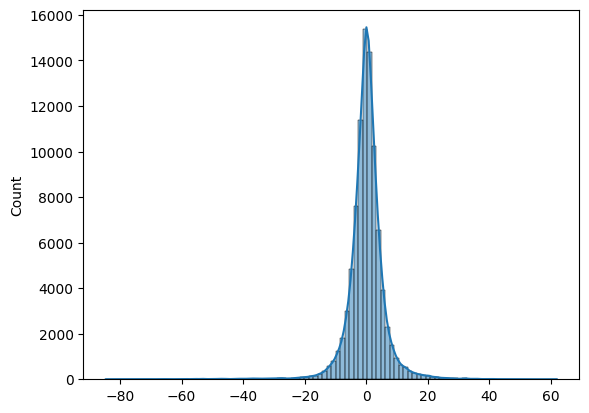

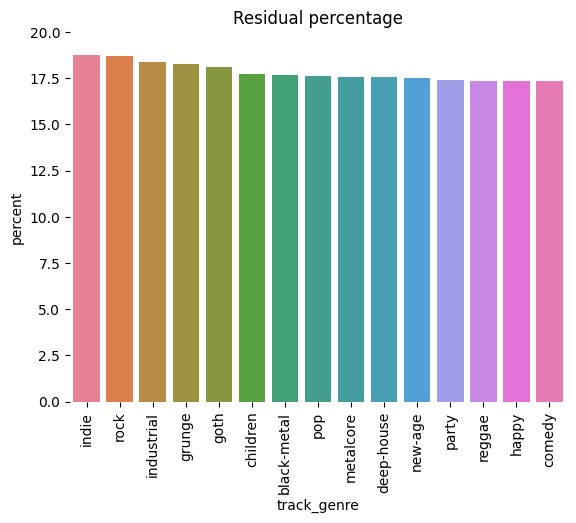

In [39]:
import ErrorAnalysisUtils as eau
importlib.reload(eau)
column_cat: str = "track_genre"
column_target: str = "popularity"
column_pred: str ="predicted_train"
limit_resid_1: int = 0
limit_resid_2: int = 30
threshold_target: int = 2
isBigger: bool = False
n = 15
eau.plotErrorAnalysisCat_num(miss_train_real, column_cat,
                      column_target, column_pred,
                      limit_resid_1, limit_resid_2,
                      threshold_target, n, isBigger
                      )

/mnt/Development-Main/Vos/S2_Porjects/Spotify_analysis/ErrorAnalysisUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_temp = pd.concat([df_temp, pd.DataFrame(new_obs,


      track_genre    percent
0   chicago-house  58.730159
7        children  57.623554
13        ambient  57.278481
1         british  56.947368
4           chill  56.751055
5       bluegrass  56.621481
3     black-metal  56.302521
6     alternative  56.276151
2        afrobeat  56.158664
9       dancehall  55.882353
14        country  55.474453
19          anime  55.287958
17          blues  55.205047
8       breakbeat  55.099895
15      classical  55.082988


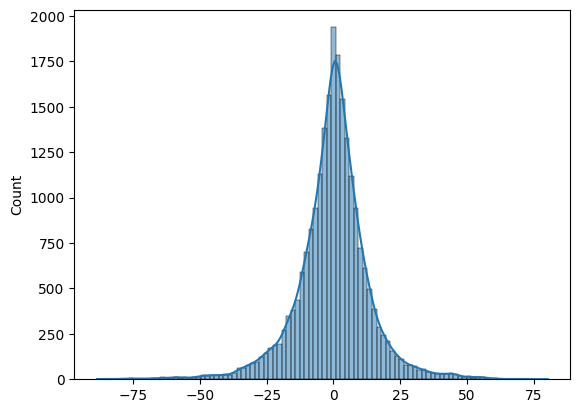

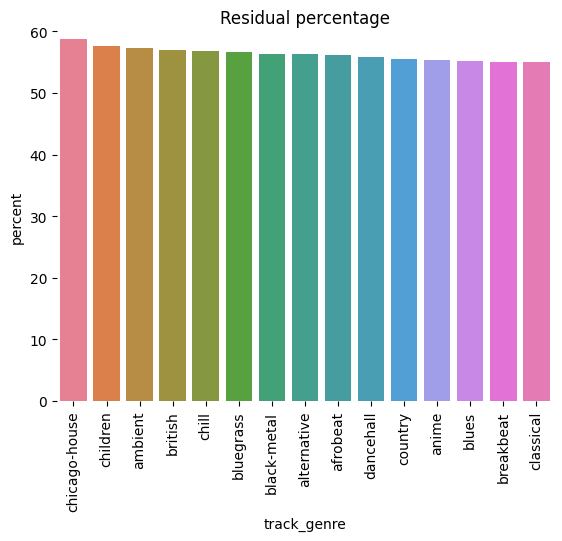

In [43]:
import ErrorAnalysisUtils as eau
importlib.reload(eau)
column_cat: str = "track_genre"
column_target: str = "popularity"
column_pred: str ="predicted_val"
limit_resid_1: int = 0
limit_resid_2: int = 30
threshold_target: int = 30
isBigger: bool = True
n = 15
eau.plotErrorAnalysisCat_num(miss_val_real, column_cat,
                      column_target, column_pred,
                      limit_resid_1, limit_resid_2,
                      threshold_target, n, isBigger
                      )

/mnt/Development-Main/Vos/S2_Porjects/Spotify_analysis/ErrorAnalysisUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_temp = pd.concat([df_temp, pd.DataFrame(new_obs,


    track_genre    percent
22     acoustic  17.299578
8     breakbeat  16.508938
15    classical  16.493776
12  death-metal  16.209150
2      afrobeat  15.970772
4         chill  15.928270
14      country  15.849844
11        dance  15.618449
17        blues  15.562566
16       comedy  15.522703
7      children  15.352261
19        anime  15.287958
21     alt-rock  15.224192
5     bluegrass  15.015641
20       brazil  14.963119


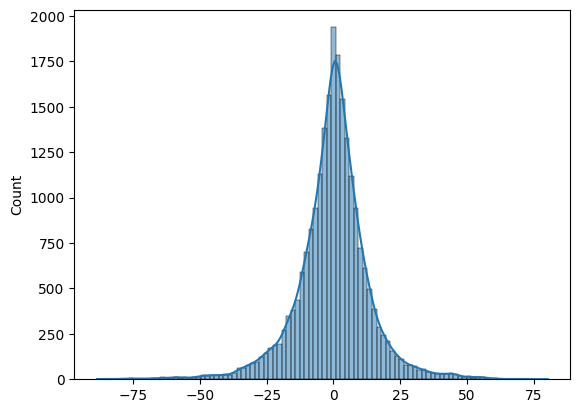

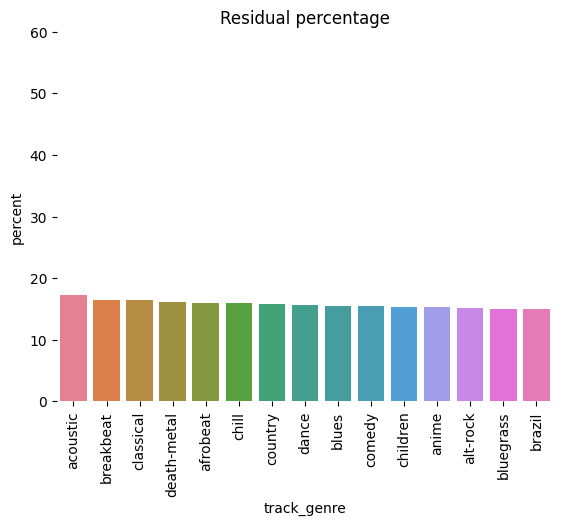

In [107]:
import ErrorAnalysisUtils as eau
importlib.reload(eau)
column_cat: str = "track_genre"
column_target: str = "popularity"
column_pred: str ="predicted_val"
limit_resid_1: int = 0
limit_resid_2: int = 30
threshold_target: int = 2
isBigger: bool = False
n = 15
eau.plotErrorAnalysisCat_num(miss_val_real, column_cat,
                      column_target, column_pred,
                      limit_resid_1, limit_resid_2,
                      threshold_target, n, isBigger
                      )

In [136]:
import ErrorAnalysisUtils as eau
importlib.reload(eau)
column_target: str = "predicted_val"
column_target_train: str = "predicted_train"
threshold_target: int = 2
isBigger: bool = False
n = 15
col_pope_real = eau.filterNumColumBasedN(miss_val_real, column_target,
                         threshold_target)

col_pope_train = eau.filterNumColumBasedN(miss_train_real, column_target_train,
                         threshold_target )

In [157]:
col_pope_real['predicted_val'].max()

1.996938589379959

In [158]:
col_pope_not_popular = col_pope_real[(col_pope_real['popularity'] >= 0) & (col_pope_real["popularity"] < 10)]
col_pop_popular = col_pope_real[(col_pope_real["popularity"]>=70) & (col_pope_real["popularity"] <= 100)]
col_pop_medium = col_pope_real[(col_pope_real["popularity"]>=10) & (col_pope_real["popularity"] < 70)]

Text(0.5, 1.0, 'Not Popular Track Genre ()')

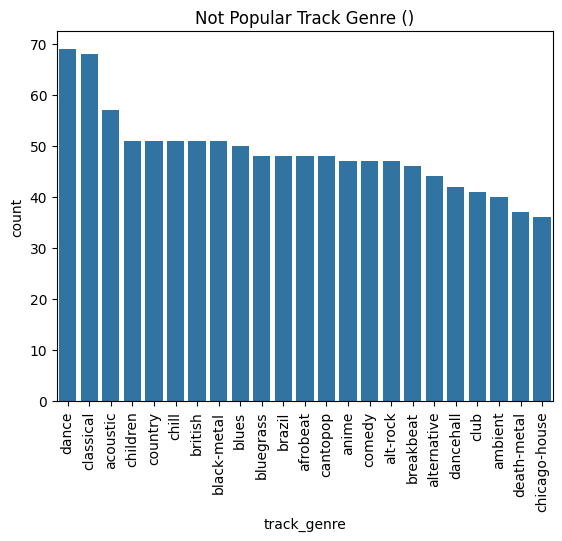

In [159]:
sns.barplot(col_pope_not_popular['track_genre'].value_counts())
plt.tick_params('x', rotation=90)
plt.title("Not Popular Track Genre ()")

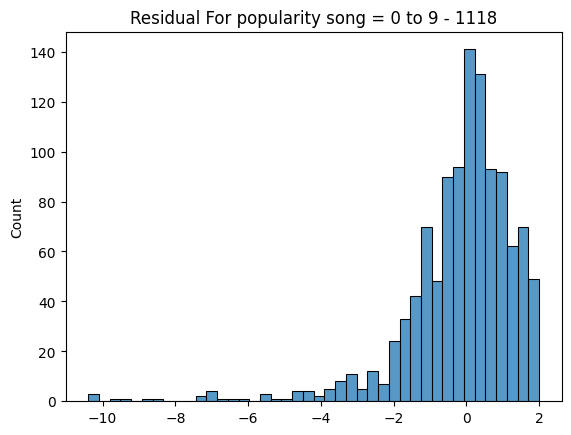

In [160]:
sns.histplot(col_pope_not_popular['predicted_val'] - col_pope_not_popular['popularity'])
plt.title(f"Residual For popularity song = 0 to 9 - {len(col_pope_not_popular)}")
plt.show()

Text(0.5, 1.0, 'Popular song 70 >= 100')

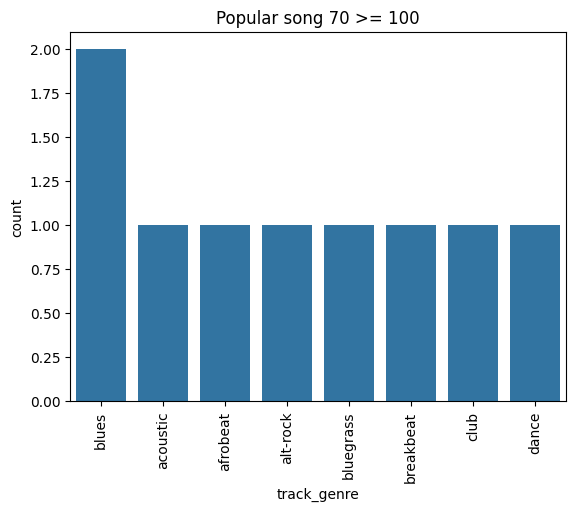

In [161]:
sns.barplot(col_pop_popular['track_genre'].value_counts())
plt.tick_params('x', rotation=90)
plt.title("Popular song 70 >= 100")

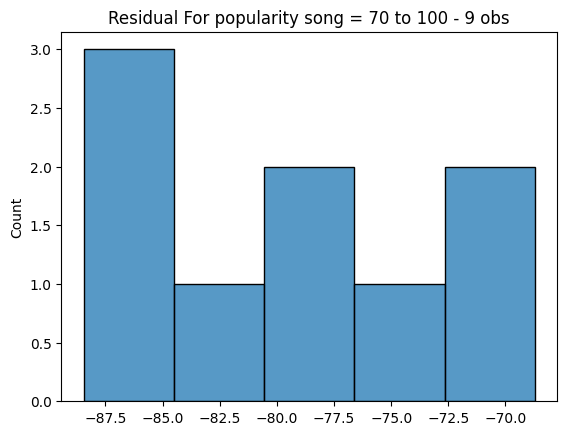

In [143]:
sns.histplot(col_pop_popular['predicted_val'] - col_pop_popular['popularity'])
plt.title(f"Residual For popularity song = 70 to 100 - {len(col_pop_popular)} obs")
plt.show()

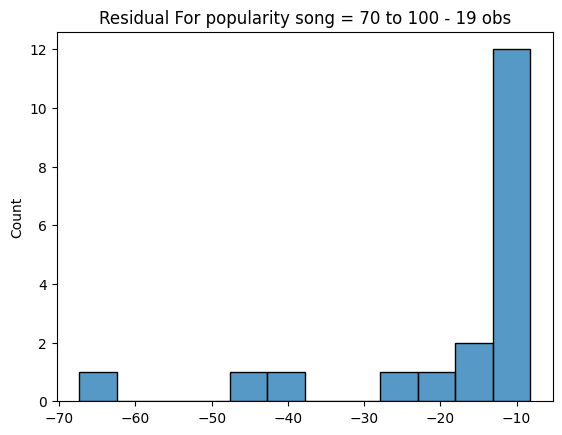

In [162]:
sns.histplot(col_pop_medium['predicted_val'] - col_pop_medium['popularity'])
plt.title(f"Residual For popularity song = 70 to 100 - {len(col_pop_medium)} obs")
plt.show()

Text(0.5, 1.0, 'Medium song 10 >= 69')

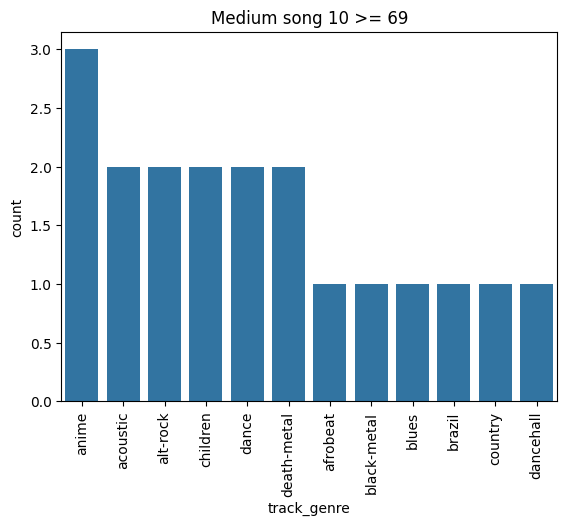

In [166]:
sns.barplot(col_pop_medium['track_genre'].value_counts())
plt.tick_params('x', rotation=90)
plt.title("Medium song 10 >= 69")

In [169]:
import ErrorAnalysisUtils as eau
importlib.reload(eau)
column_target: str = "predicted_val"
column_target_train: str = "predicted_train"
threshold_target_1: int = 10
threshold_target_2: int = 30
isBigger: bool = False
n = 15
col_pope_real_rg = eau.filterNumColumBasedNRange(miss_val_real, column_target,
                                              threshold_target_1, threshold_target_2)

/mnt/Development-Main/Vos/S2_Porjects/Spotify_analysis/ErrorAnalysisUtils.py:145: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tmp = pd.concat(df_tmp, df[(df[num_col] >= threshold_1) & (df[num_col] <= threshold_2)])


In [170]:
col_pope_rg_not_popular = col_pope_real_rg[(col_pope_real_rg['popularity'] >= 0) & (col_pope_real_rg["popularity"] < 10)]
col_pop_rg_popular = col_pope_real_rg[(col_pope_real_rg["popularity"]>=70) & (col_pope_real_rg["popularity"] <= 100)]
col_pop_rg_medium = col_pope_real_rg[(col_pope_real_rg["popularity"]>=10) & (col_pope_real_rg["popularity"] < 70)]

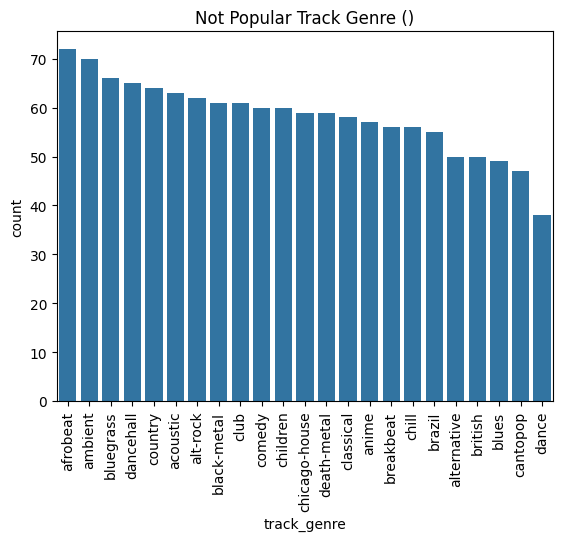

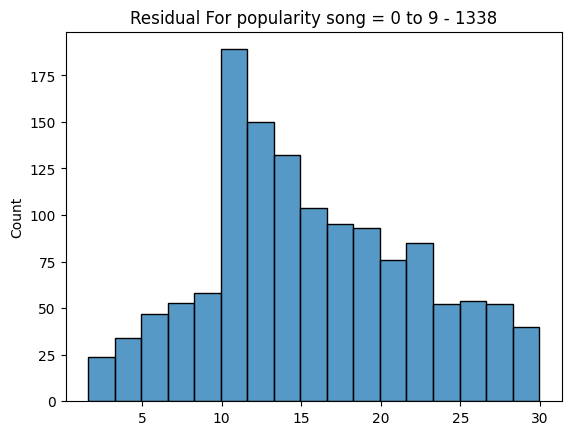

In [179]:
sns.barplot(col_pope_rg_not_popular['track_genre'].value_counts())
plt.tick_params('x', rotation=90)
plt.title("Not Popular Track Genre ()")
plt.show()
sns.histplot(col_pope_rg_not_popular['predicted_val'] - col_pope_rg_not_popular['popularity'])
plt.title(f"Residual For popularity song = 0 to 9 - {len(col_pope_rg_not_popular)}")
plt.show()

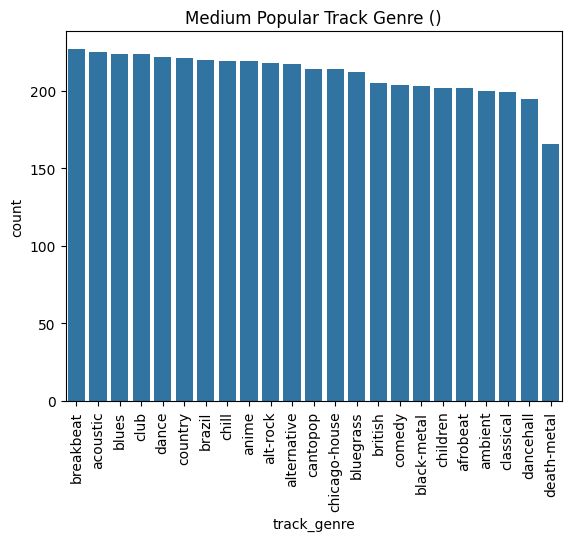

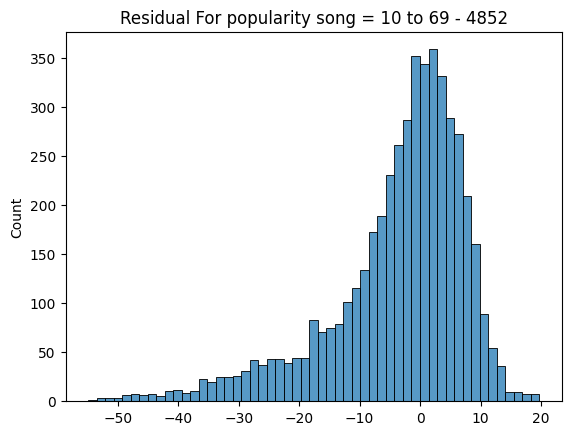

In [180]:
sns.barplot(col_pop_rg_medium['track_genre'].value_counts())
plt.tick_params('x', rotation=90)
plt.title("Medium Popular Track Genre ()")
plt.show()
sns.histplot(col_pop_rg_medium['predicted_val'] - col_pop_rg_medium['popularity'])
plt.title(f"Residual For popularity song = 10 to 69 - {len(col_pop_rg_medium)}")
plt.show()

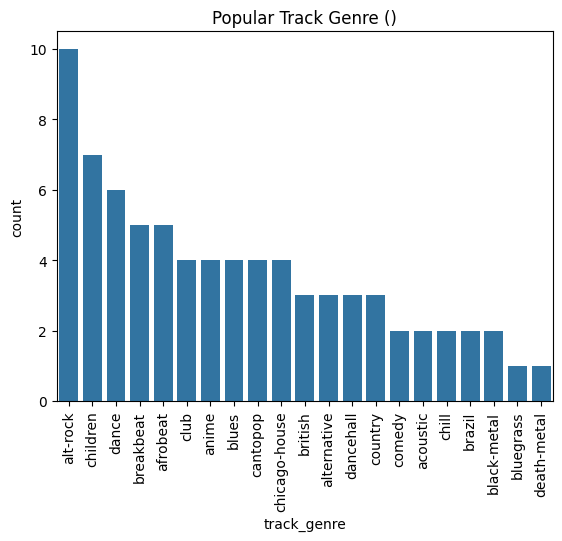

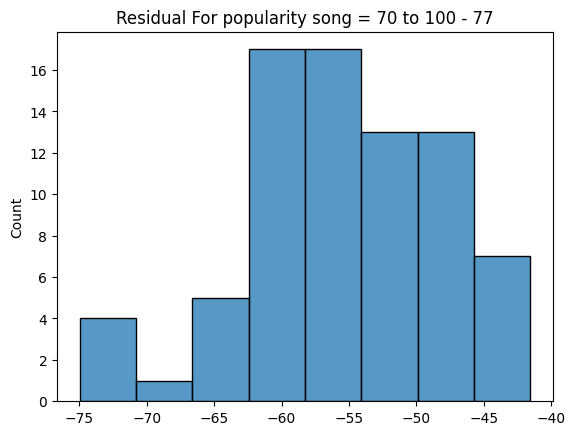

In [181]:
sns.barplot(col_pop_rg_popular['track_genre'].value_counts())
plt.tick_params('x', rotation=90)
plt.title("Popular Track Genre ()")
plt.show()
sns.histplot(col_pop_rg_popular['predicted_val'] - col_pop_rg_popular['popularity'])
plt.title(f"Residual For popularity song = 70 to 100 - {len(col_pop_rg_popular)}")
plt.show()